In [67]:
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
%matplotlib inline 
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [68]:
#read in cleaned, df from previous notebook
df = pd.read_csv('for_model.csv', index_col=0)

In [3]:
df.head()

,popularity,runtime,vote_average,vote_count,budget,revenue,No_English,highest_paid_actor,nom_dir,Action,Adventure,Fantasy,Crime,Drama,Science Fiction,Animation,Family,Thriller,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,150.437577,162.0,7.2,11800,237000000,2787965087,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,139.082615,169.0,6.9,4500,300000000,961000000,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,107.376788,148.0,6.3,4466,245000000,880674609,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,112.312950,165.0,7.6,9106,250000000,1084939099,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,43.926995,132.0,6.1,2124,260000000,284139100,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Correlation of features to revenue: Overall

In [69]:
df_corr = df.corr()
df_corr['revenue'].sort_values(ascending=False).reset_index()

,index,revenue
0,revenue,1.000000
1,vote_count,0.781437
2,budget,0.730764
3,popularity,0.644631
4,Adventure,0.344278
5,highest_paid_actor,0.269657
6,runtime,0.251112
7,Fantasy,0.212187
8,Action,0.203402
9,Animation,0.199265


## Correlation of Genre features to Revenue

In [4]:
genre_var = ['Action',
       'Adventure', 'Fantasy', 'Crime', 'Drama', 'Science Fiction',
       'Animation', 'Family', 'Thriller', 'Western', 'Comedy', 'Romance',
       'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary',
       'Foreign', 'TV Movie','revenue']
genre_corr = df[genre_var]
corr = genre_corr.corr()

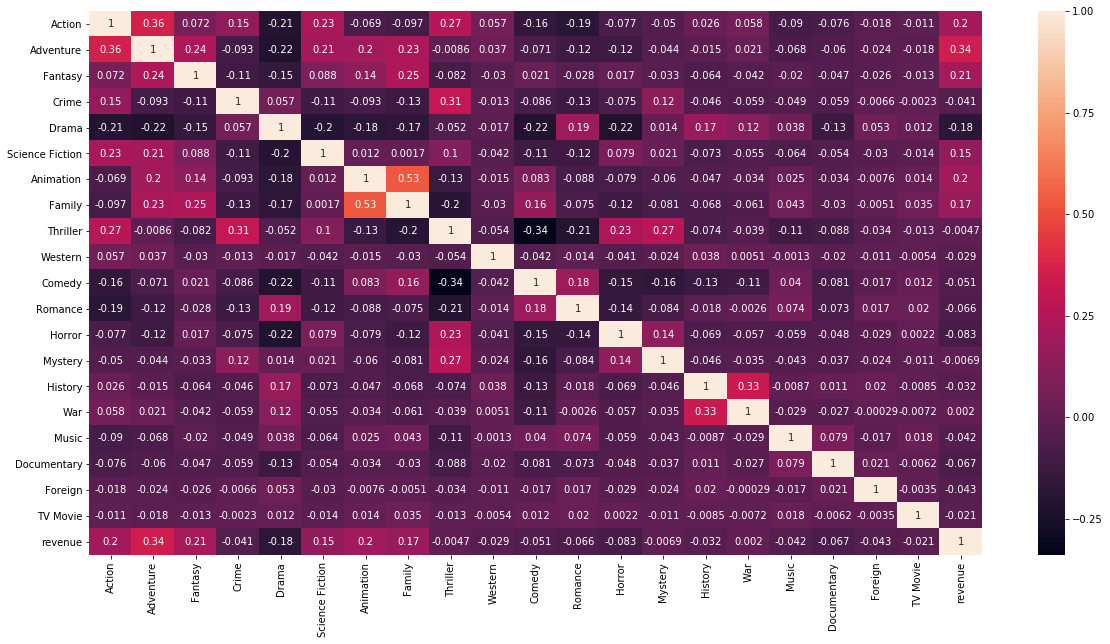

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True)

Fantasy, Action, Animation, Family, and Science Fiction genres have the highest correlation to Revenue


## Multi-Variate Linear Regression

In [62]:
X_df = df[['budget', 'popularity', 'vote_count','vote_average','Adventure','highest_paid_actor','runtime','Fantasy','Action','Animation','Family','Science Fiction']]
y_df = df[['revenue']]
    
scaler = preprocessing.MinMaxScaler()
scaled_df_x = scaler.fit_transform(X_df)
scaled_df_x = pd.DataFrame(scaled_df_x, columns=[['budget', 'popularity', 'vote_count','vote_average','Adventure','highest_paid_actor','runtime','Fantasy','Action','Animation','Family','Science Fiction']])

scaled_df = pd.concat([scaled_df_x, y_df], axis=1, sort=False)

scaled_df.dropna(inplace=True)

scaled_df

/Users/ryanfitzpatrick/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,"(budget,)","(popularity,)","(vote_count,)","(vote_average,)","(Adventure,)","(highest_paid_actor,)","(runtime,)","(Fantasy,)","(Action,)","(Animation,)","(Family,)","(Science Fiction,)",revenue
0,6.236842e-01,1.718142e-01,0.858057,0.72,1.0,0.0,0.479290,1.0,1.0,0.0,0.0,1.0,2.787965e+09
1,7.894737e-01,1.588457e-01,0.327225,0.69,1.0,1.0,0.500000,1.0,1.0,0.0,0.0,0.0,9.610000e+08
2,6.447368e-01,1.226345e-01,0.324753,0.63,1.0,0.0,0.437870,0.0,1.0,0.0,0.0,0.0,8.806746e+08
3,6.578947e-01,1.282721e-01,0.662158,0.76,0.0,0.0,0.488166,0.0,1.0,0.0,0.0,0.0,1.084939e+09
4,6.842105e-01,5.016855e-02,0.154450,0.61,1.0,0.0,0.390533,0.0,1.0,0.0,0.0,1.0,2.841391e+08
5,6.789474e-01,1.321402e-01,0.260035,0.59,1.0,0.0,0.411243,1.0,1.0,0.0,0.0,0.0,8.908716e+08
6,6.842105e-01,5.559920e-02,0.242147,0.74,0.0,0.0,0.295858,0.0,0.0,1.0,1.0,0.0,5.917949e+08
7,7.368421e-01,1.533597e-01,0.492074,0.73,1.0,1.0,0.417160,0.0,1.0,0.0,0.0,1.0,1.405404e+09
8,6.578947e-01,1.129368e-01,0.384889,0.74,1.0,0.0,0.452663,1.0,0.0,0.0,1.0,0.0,9.339592e+08
9,6.578947e-01,1.779277e-01,0.509308,0.57,1.0,0.0,0.446746,1.0,1.0,0.0,0.0,0.0,8.732602e+08


In [63]:
X = scaled_df.iloc[:, 0:10].values
y = scaled_df.iloc[:, -1].values

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30)

In [70]:
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
#Predict Output
lin_predicted = linear.predict(X_test)

linear_score_train = linear.score(X_train, y_train)
linear_score_test = linear.score(X_test, y_test)
print(linear_score_train)
print(linear_score_test)
R2_score = metrics.r2_score(y_test,lin_predicted)
#Equation coefficient and Intercept
print('Linear Regression R2 Score: \n', R2_score)
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

0.68980210486
0.73349841776
Linear Regression R2 Score: 
 0.73349841776
Coefficient: 
 [  6.05017275e+08   1.63277855e+08   9.16110806e+08  -5.35211704e+07
   1.89268215e+07   9.31411237e+06   1.96086052e+07   3.65594589e+06
  -1.17662085e+07   3.37677359e+07]
Intercept: 
 10506404.7345


In [96]:
pd.DataFrame(list(zip(X_df.columns, linear.coef_)), columns = ['features', 'coefficients'])

,features,coefficients
0,budget,6.492160e+08
1,popularity,1.997882e+08
2,vote_count,8.447316e+08
3,vote_average,-5.320232e+07
4,Adventure,1.555339e+07
5,highest_paid_actor,1.631277e+07
6,runtime,1.871793e+07
7,Fantasy,-1.399964e+06
8,Action,-1.736315e+07
9,Animation,4.689067e+07


After normalizing the data to account for differences in magnitude using MinMaxScalar and fitting the model, a 0.73 R2 score was achieved with vote_count having the highest coefficient value


## Check out the relationship between vote count (independent variable) and revenue (dependent variable)

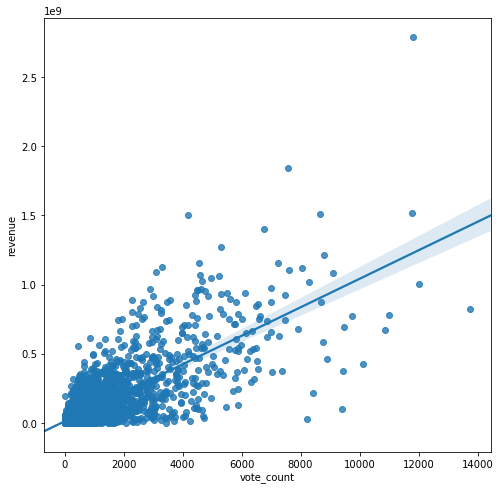

In [99]:
plt.figure(figsize=(8,8))
sns.regplot(x=df["vote_count"], y=df["revenue"], fit_reg=True)

## Feature Importance with XGBoost

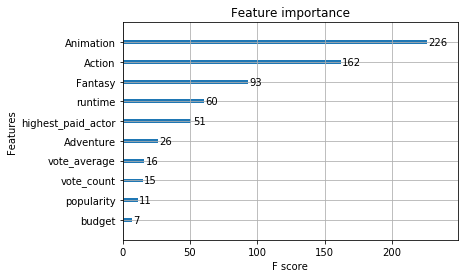

In [44]:
#split into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
xgb = XGBRegressor()
xgb_fit = xgb.fit(X_train, y_train)
_ =plot_importance(xgb_fit).set_yticklabels(labels = ['budget', 'popularity', 'vote_count','vote_average','Adventure','highest_paid_actor','runtime','Fantasy','Action','Animation','Family','Science Fiction'])

In [59]:
xgboost_pred = xgb.predict(X_test)
xgboost_train = xgb.predict(X_train)
print(metrics.explained_variance_score(xgboost_pred,y_test))

0.762913253868


Surprisingly, the Animation genre was listed as the most important feature, with budget coming in last of all included variables. Overall, explained variance score from model wasn’t bad at 76%.
